# 01. Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path
path = r'/Users/mindydong/Documents/School/Data Analyst/Achievement 6 /Medicare QPP/'

In [3]:
#import state aggregated data
df_qpp = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'state_agg.pkl'))

# 02. Create correlation heatmap

In [4]:
#create subset for number_ffs_members, number_of_providers, number of users, and total payment
subset = df_qpp[['number_ffs_members','number_of_providers','number_of_users',
       'total_payment']]

In [5]:
subset

,number_ffs_members,number_of_providers,number_of_users,total_payment
231625,547486.0,146.0,73215.0,7.464155e+07
231626,91480.0,33.0,8414.0,6.904088e+06
231627,740278.0,170.0,68228.0,4.917614e+07
231628,437616.0,86.0,54014.0,4.951514e+07
231629,3423285.0,330.0,385799.0,3.458350e+08
...,...,...,...,...
987484,1185624.0,423.0,40978.0,8.991444e+06
987485,935054.0,435.0,26563.0,5.147131e+06
987486,261392.0,167.0,12511.0,1.994584e+06
987487,662694.0,134.0,11737.0,2.837753e+06


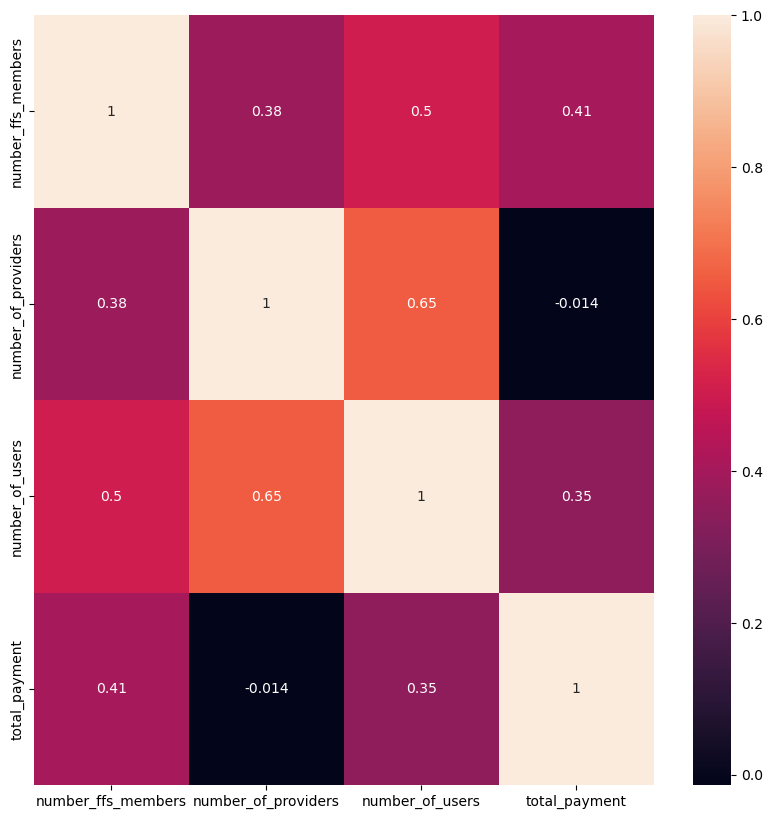

In [6]:
#create a subplot with matplotlib
fig, ax = plt.subplots(figsize = (10,10))

#create correlation heatmap
corr = sns.heatmap(subset.corr(), annot = True, ax=ax)

There is a stronger correlation between the number of providers and number of users. There is also a stronger correlation betwen the number of users and the number of FFS members (user means members that have had a paid claim for a service and a member is merely someone that is enrolled in a Medicare FFS plan).

In [7]:
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap.png'))

## 03. Create scatterplots

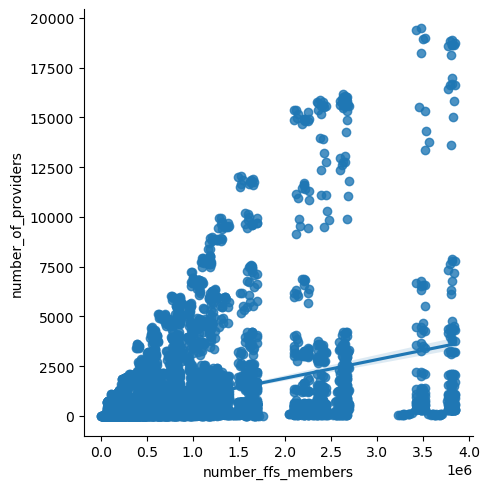

In [8]:
#create scatterplot for members vs number of providers
member_provider_scatter = sns.lmplot(x = 'number_ffs_members', y = 'number_of_providers', data = df_qpp)

It's interesting to see that it's clutered towards the lower end. There is a slightly positive correlation between number of ffs members and number of providers. It would've been concerning to see a small amount of members and a large amount of providers.

In [9]:
#export scatterplot
member_provider_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'member_provider_scatter.png'))

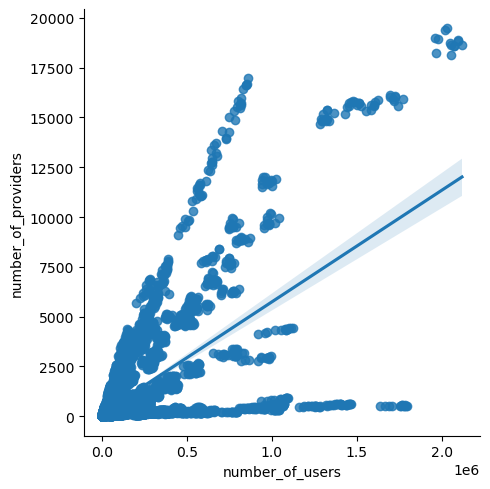

In [10]:
#create scatterplot for users vs providers
user_provider_scatter = sns.lmplot(x = 'number_of_users', y = 'number_of_providers', data = df_qpp)

Number of users and number of providers had the strongest positive correlation, which makes sense because the definition of a user in this dataset requires a member to have had a claim filed. In order to have claims filed, one must see a provider. However, the results are clustered on the low end (0,0)

In [11]:
#export scatterplot
user_provider_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'user_provider_scatter.png'))

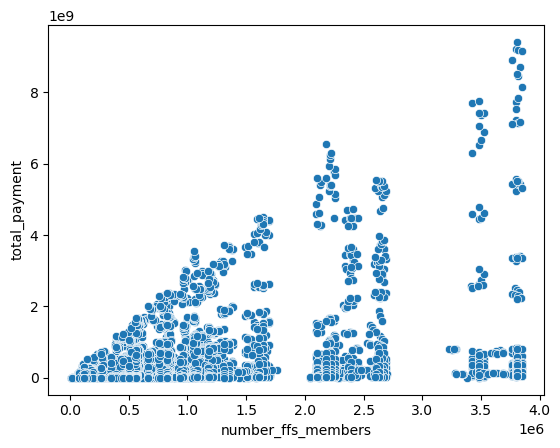

In [12]:
#create scatterplot for members vs payment
member_payment_scatter = sns.scatterplot(x = 'number_ffs_members', y = 'total_payment', data = df_qpp)

This scatterplot looks very similar to the first one. The values are still clustered towards the lower end.

In [13]:
#export scatterplot
member_payment_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'member_payment_scatter.png'))

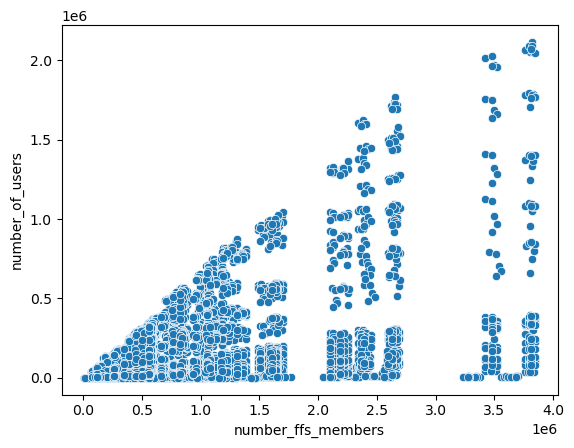

In [14]:
#create scatterplot for members vs users
member_user_scatter = sns.scatterplot(x = 'number_ffs_members', y = 'number_of_users', data = df_qpp)

This scatterplot looks similar to the first plot and the one above this. 

In [15]:
#export scatterplot
member_user_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'member_user_scatter.png'))

## 04. Create pairplot with random sample

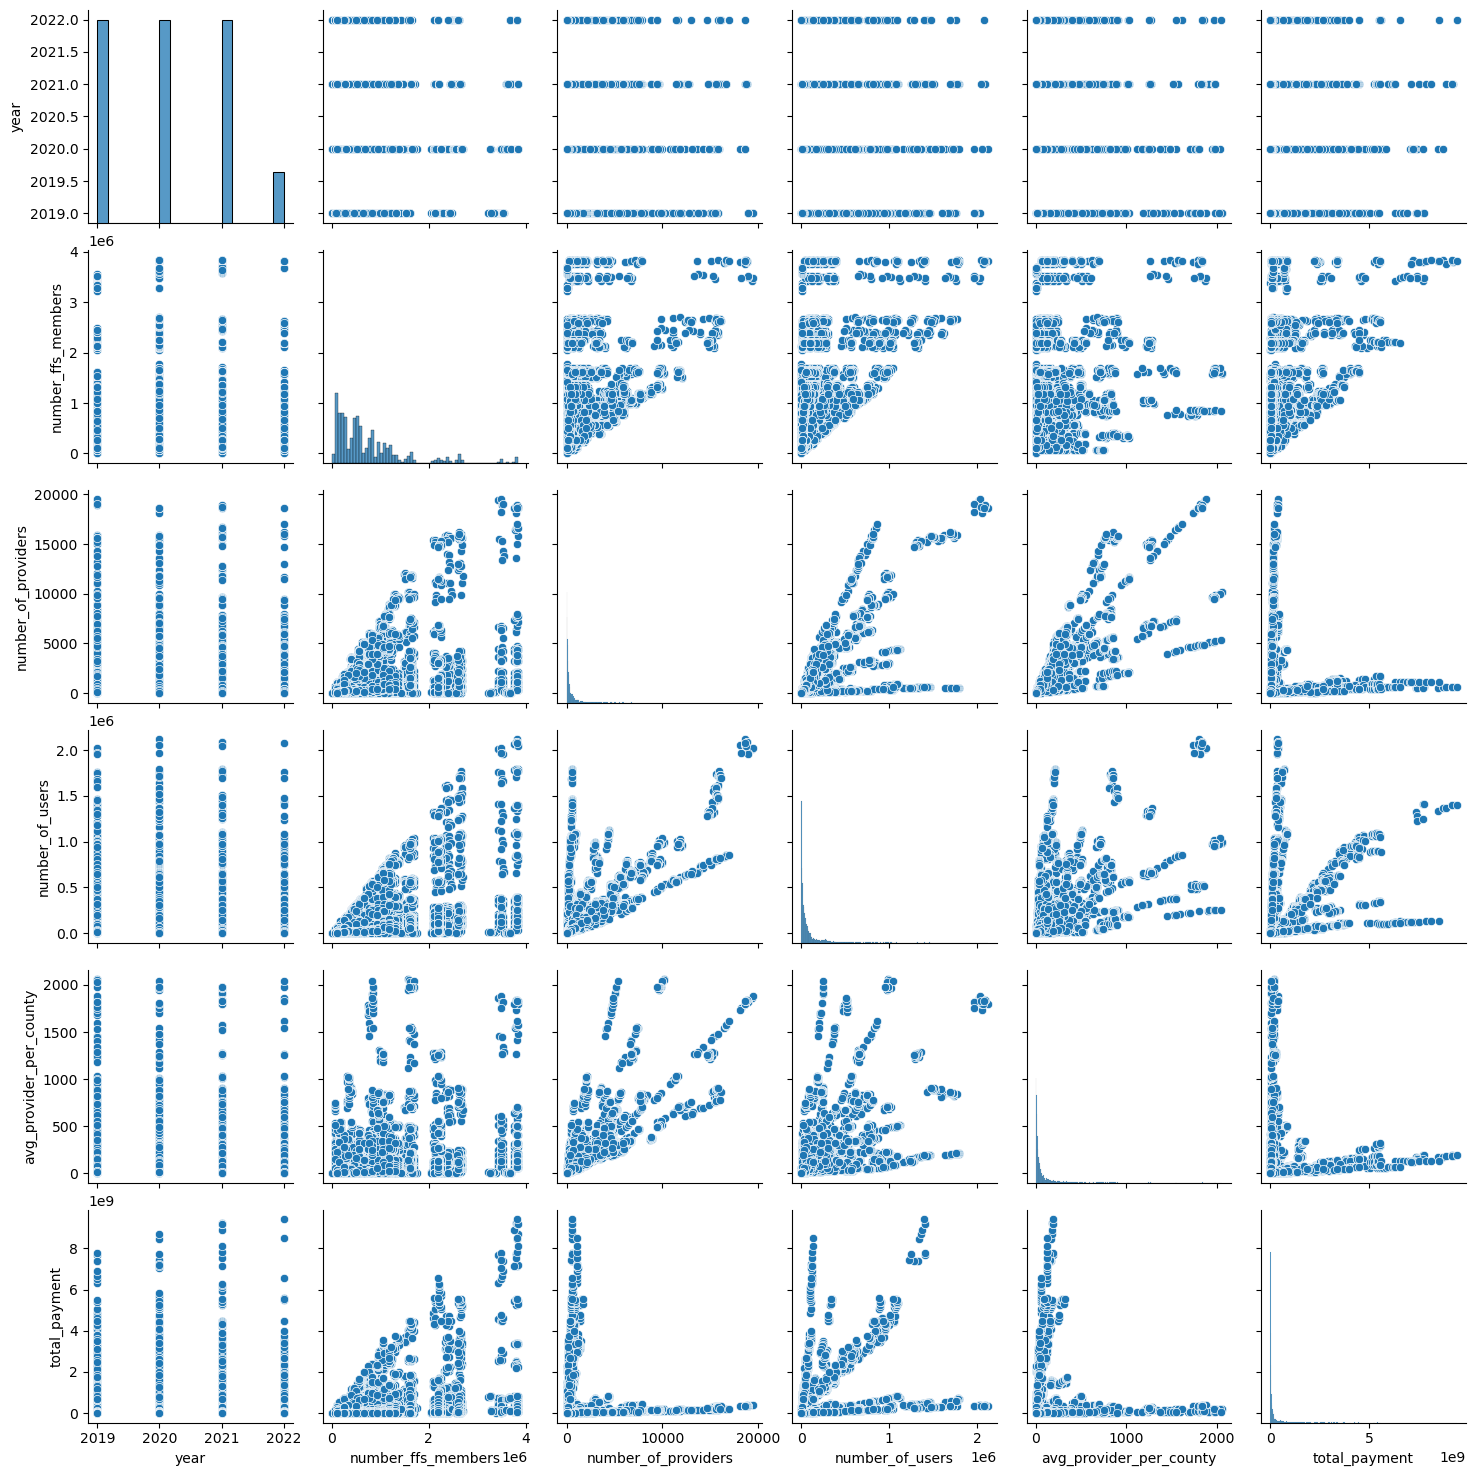

In [16]:
# create pair plot 
pair_plot = sns.pairplot(df_qpp)

In [17]:
#export pairplot
pair_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pairplot.png'))

## 05. Create categorical plot

<Axes: xlabel='total_payment', ylabel='Count'>

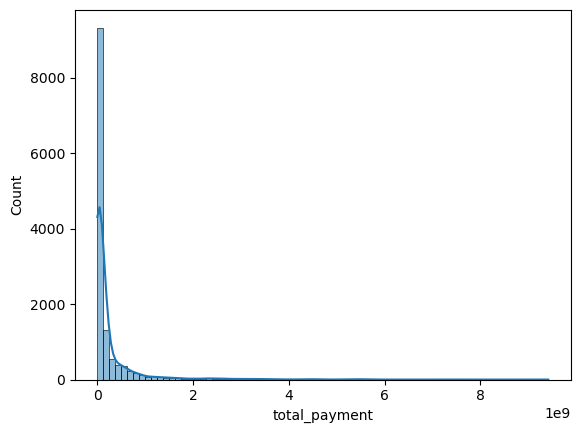

In [18]:
#create histogram of total_payment
sns.histplot(df_qpp['total_payment'], bins = 75, kde = True)

### Exploratory analysis for skew

In [19]:
df_qpp['total_payment'].mean()

256816659.95281023

In [20]:
df_qpp['total_payment'].median()

42191655.19

In [21]:
df_qpp['total_payment'].min()

3286.17

In [22]:
df_qpp['total_payment'].max()

9418765824.55

In [23]:
df_qpp.loc[df_qpp['total_payment'] > 10000000]

,year,service_type,aggregation_level,state,county,number_ffs_members,number_of_providers,avg_user_per_provider,percent_users_out_of_ffs_members,number_of_users,...,number_ffs_member_change,number_of_providers_change,avg_number_user_per_provider_change,percent_user_out_ffs_member_change,number_of_users_change,avg_number_provider_per_county_change,number_of_dual_eligible_users_change,percent_dual_elig_user_from_total_user_change,percent_dual_elig_user_from_dual_elig_ffs_member_change,total_payment_change
231625,2019.0,Ambulance (Emergency & Non-Emergency),STATE,AL,--ALL--,547486.0,146.0,501.47,13.37%,73215.0,...,3.53%,( 2.01%),0.86%,( 4.57%),( 1.17%),1.82%,(11.81%),(10.78%),( 1.35%),( 2.76%)
231627,2019.0,Ambulance (Emergency & Non-Emergency),STATE,AZ,--ALL--,740278.0,170.0,401.34,9.22%,68228.0,...,8.98%,( 3.41%),6.63%,( 5.44%),3.00%,( 5.90%),( 1.55%),( 4.38%),( 6.60%),7.07%
231628,2019.0,Ambulance (Emergency & Non-Emergency),STATE,AR,--ALL--,437616.0,86.0,628.07,12.34%,54014.0,...,3.79%,( 3.37%),5.17%,( 2.14%),1.62%,( 7.84%),,,,3.64%
231629,2019.0,Ambulance (Emergency & Non-Emergency),STATE,CA,--ALL--,3423285.0,330.0,1169.09,11.27%,385799.0,...,6.03%,0.30%,2.24%,( 3.26%),2.55%,( 0.16%),0.05%,( 2.44%),( 0.34%),3.10%
231630,2019.0,Ambulance (Emergency & Non-Emergency),STATE,CO,--ALL--,500722.0,135.0,324.33,8.74%,43785.0,...,2.85%,( 0.74%),( 0.00%),( 3.53%),( 0.74%),( 0.06%),( 5.17%),( 4.46%),1.76%,0.01%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987460,2022.0,Telemedicine,STATE,MI,--ALL--,1082842.0,918.0,66.95,5.68%,61461.0,...,( 3.72%),(22.40%),4.43%,(15.73%),(18.96%),(26.07%),(17.58%),1.72%,( 7.71%),(31.12%)
987468,2022.0,Telemedicine,STATE,NJ,--ALL--,1174303.0,859.0,70.49,5.16%,60552.0,...,0.30%,(12.61%),7.67%,( 6.18%),( 5.91%),(14.42%),( 7.80%),( 2.05%),( 8.18%),(13.83%)
987470,2022.0,Telemedicine,STATE,NY,--ALL--,2183802.0,1525.0,69.25,4.84%,105599.0,...,( 0.99%),( 8.30%),6.46%,( 1.22%),( 2.38%),( 4.33%),(10.08%),( 7.91%),( 2.23%),( 9.70%)
987476,2022.0,Telemedicine,STATE,PA,--ALL--,1606945.0,854.0,60.42,3.21%,51595.0,...,( 0.92%),( 7.97%),( 7.60%),(14.17%),(14.98%),1.30%,(22.63%),( 9.00%),(17.15%),(27.64%)


### Investigate the zero providers

In [24]:
df_qpp.loc[df_qpp['number_of_providers'] == 0]

,year,service_type,aggregation_level,state,county,number_ffs_members,number_of_providers,avg_user_per_provider,percent_users_out_of_ffs_members,number_of_users,...,number_ffs_member_change,number_of_providers_change,avg_number_user_per_provider_change,percent_user_out_ffs_member_change,number_of_users_change,avg_number_provider_per_county_change,number_of_dual_eligible_users_change,percent_dual_elig_user_from_total_user_change,percent_dual_elig_user_from_dual_elig_ffs_member_change,total_payment_change
267368,2019.0,Long-Term Care Hospitals,STATE,RI,--ALL--,58678.0,0.0,NaN,0.03%,19.0,...,5.15%,,,0.00%,26.67%,,,,,28.69%
287221,2019.0,Telemedicine,STATE,CT,--ALL--,362779.0,0.0,NaN,0.04%,155.0,...,14.56%,(100.0%),,100.0%,96.20%,(100.0%),52.50%,(22.28%),50.00%,50.36%
287223,2019.0,Telemedicine,STATE,DC,--ALL--,66178.0,0.0,NaN,0.07%,49.0,...,6.57%,,,133.3%,188.2%,,127.3%,(21.16%),150.0%,356.4%
287254,2019.0,Telemedicine,STATE,RI,--ALL--,58678.0,0.0,NaN,0.03%,15.0,...,,,,,,,,,,
325490,2019.0,Long-Term Care Hospitals,STATE,RI,--ALL--,59958.0,0.0,NaN,0.03%,16.0,...,4.40%,,,0.00%,(11.11%),,,,,16.85%
383932,2019.0,Long-Term Care Hospitals,STATE,RI,--ALL--,60303.0,0.0,NaN,0.03%,19.0,...,2.50%,,,0.00%,0.00%,,,,,51.15%
442360,2019.0,Long-Term Care Hospitals,STATE,RI,--ALL--,60587.0,0.0,NaN,0.03%,17.0,...,2.80%,,,(25.00%),(22.73%),,,,,11.70%
500713,2020.0,Long-Term Care Hospitals,STATE,RI,--ALL--,58818.0,0.0,NaN,0.03%,20.0,...,0.24%,,,0.00%,5.26%,,,,,( 3.51%)
559073,2020.0,Long-Term Care Hospitals,STATE,ME,--ALL--,33738.0,0.0,NaN,0.04%,13.0,...,,,,,,,,,,
559093,2020.0,Long-Term Care Hospitals,STATE,RI,--ALL--,64354.0,0.0,NaN,0.04%,23.0,...,7.33%,,,33.33%,43.75%,,,,,29.34%


In [25]:
df_qpp['number_of_providers'].describe()

count    13223.000000
mean       711.208803
std       1766.507778
min          0.000000
25%         65.000000
50%        166.000000
75%        525.000000
max      19475.000000
Name: number_of_providers, dtype: float64

In [26]:
#create df with zero providers
zero_prov = df_qpp[df_qpp['number_of_providers'] == 0]

In [27]:
zero_prov.head()

,year,service_type,aggregation_level,state,county,number_ffs_members,number_of_providers,avg_user_per_provider,percent_users_out_of_ffs_members,number_of_users,...,number_ffs_member_change,number_of_providers_change,avg_number_user_per_provider_change,percent_user_out_ffs_member_change,number_of_users_change,avg_number_provider_per_county_change,number_of_dual_eligible_users_change,percent_dual_elig_user_from_total_user_change,percent_dual_elig_user_from_dual_elig_ffs_member_change,total_payment_change
267368,2019.0,Long-Term Care Hospitals,STATE,RI,--ALL--,58678.0,0.0,NaN,0.03%,19.0,...,5.15%,,,0.00%,26.67%,,,,,28.69%
287221,2019.0,Telemedicine,STATE,CT,--ALL--,362779.0,0.0,NaN,0.04%,155.0,...,14.56%,(100.0%),,100.0%,96.20%,(100.0%),52.50%,(22.28%),50.00%,50.36%
287223,2019.0,Telemedicine,STATE,DC,--ALL--,66178.0,0.0,NaN,0.07%,49.0,...,6.57%,,,133.3%,188.2%,,127.3%,(21.16%),150.0%,356.4%
287254,2019.0,Telemedicine,STATE,RI,--ALL--,58678.0,0.0,NaN,0.03%,15.0,...,,,,,,,,,,
325490,2019.0,Long-Term Care Hospitals,STATE,RI,--ALL--,59958.0,0.0,NaN,0.03%,16.0,...,4.40%,,,0.00%,(11.11%),,,,,16.85%


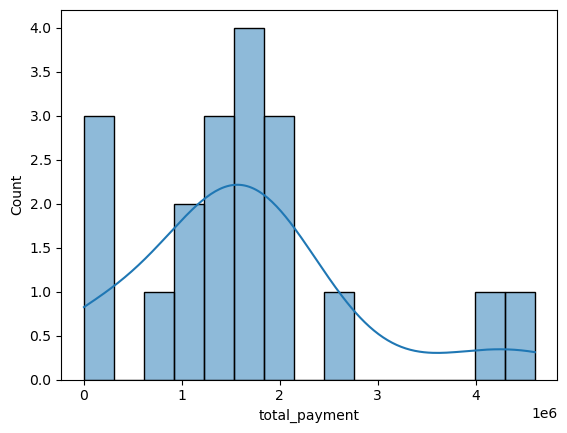

In [28]:
#create histogram of number_of_users with the zero provider subset
zero_prov_hist = sns.histplot(zero_prov['total_payment'], bins = 15, kde = True)

In [29]:
#export histogram
zero_prov_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'zero_provider_hist.png'))

### Investigate non-zero values for number of providers

In [30]:
nonzero_prov = df_qpp[df_qpp['number_of_providers'] > 0]
nonzero_prov['total_payment'].describe()

count    1.320400e+04
mean     2.571838e+08
std      6.958738e+08
min      2.282755e+04
25%      1.201299e+07
50%      4.230373e+07
75%      1.615344e+08
max      9.418766e+09
Name: total_payment, dtype: float64

<Axes: xlabel='total_payment', ylabel='Count'>

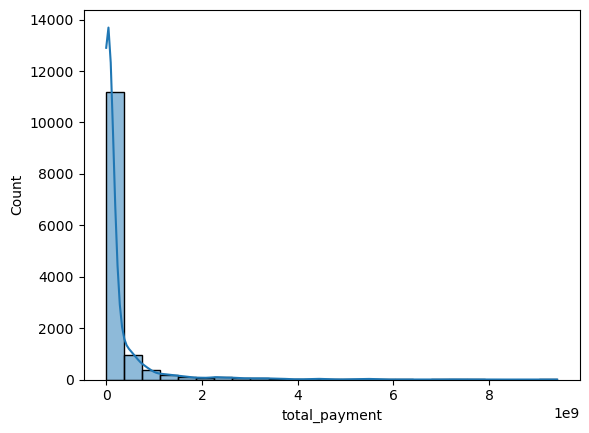

In [31]:
#create histogram of total_payment with the zero provider subset
sns.histplot(nonzero_prov['total_payment'], bins = 25, kde = True)

Another right skewed histogram with only one column. Will explore further.

<Axes: xlabel='number_of_users', ylabel='Count'>

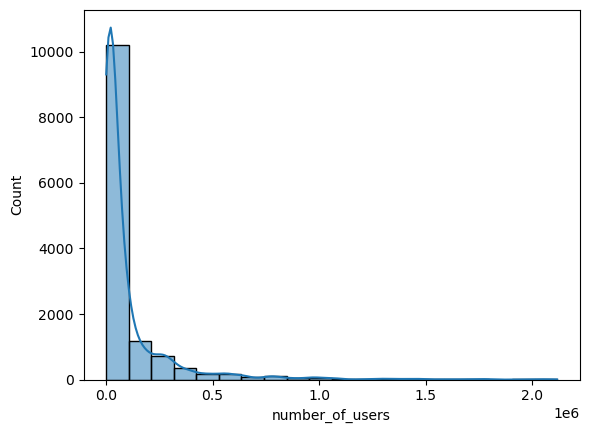

In [32]:
#create histogram of number_of_users with the nonzero provider subset
sns.histplot(nonzero_prov['number_of_users'], bins = 20, kde = True)

In [33]:
nonzero_prov.head()

,year,service_type,aggregation_level,state,county,number_ffs_members,number_of_providers,avg_user_per_provider,percent_users_out_of_ffs_members,number_of_users,...,number_ffs_member_change,number_of_providers_change,avg_number_user_per_provider_change,percent_user_out_ffs_member_change,number_of_users_change,avg_number_provider_per_county_change,number_of_dual_eligible_users_change,percent_dual_elig_user_from_total_user_change,percent_dual_elig_user_from_dual_elig_ffs_member_change,total_payment_change
231625,2019.0,Ambulance (Emergency & Non-Emergency),STATE,AL,--ALL--,547486.0,146.0,501.47,13.37%,73215.0,...,3.53%,( 2.01%),0.86%,( 4.57%),( 1.17%),1.82%,(11.81%),(10.78%),( 1.35%),( 2.76%)
231626,2019.0,Ambulance (Emergency & Non-Emergency),STATE,AK,--ALL--,91480.0,33.0,254.97,9.20%,8414.0,...,38.93%,3.13%,19.77%,(11.11%),23.52%,0.15%,0.67%,(18.50%),0.27%,21.32%
231627,2019.0,Ambulance (Emergency & Non-Emergency),STATE,AZ,--ALL--,740278.0,170.0,401.34,9.22%,68228.0,...,8.98%,( 3.41%),6.63%,( 5.44%),3.00%,( 5.90%),( 1.55%),( 4.38%),( 6.60%),7.07%
231628,2019.0,Ambulance (Emergency & Non-Emergency),STATE,AR,--ALL--,437616.0,86.0,628.07,12.34%,54014.0,...,3.79%,( 3.37%),5.17%,( 2.14%),1.62%,( 7.84%),,,,3.64%
231629,2019.0,Ambulance (Emergency & Non-Emergency),STATE,CA,--ALL--,3423285.0,330.0,1169.09,11.27%,385799.0,...,6.03%,0.30%,2.24%,( 3.26%),2.55%,( 0.16%),0.05%,( 2.44%),( 0.34%),3.10%


In [34]:
nonzero_prov['total_payment'].describe()

count    1.320400e+04
mean     2.571838e+08
std      6.958738e+08
min      2.282755e+04
25%      1.201299e+07
50%      4.230373e+07
75%      1.615344e+08
max      9.418766e+09
Name: total_payment, dtype: float64

In [35]:
nonzero_prov.loc[(nonzero_prov['total_payment'] >= 22000) & (nonzero_prov['total_payment'] <= 12000000), 'payment category'] = 'low payment'

/var/folders/2d/wsjd0mc13vl4q6p45np_hyx00000gn/T/ipykernel_1541/2603965325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonzero_prov.loc[(nonzero_prov['total_payment'] >= 22000) & (nonzero_prov['total_payment'] <= 12000000), 'payment category'] = 'low payment'


In [36]:
nonzero_prov.loc[(nonzero_prov['total_payment'] > 12000000) & (nonzero_prov['total_payment'] <= 42000000), 'payment category'] = 'low-moderate payment'

In [37]:
nonzero_prov.loc[(nonzero_prov['total_payment'] > 42000000) & (nonzero_prov['total_payment'] <= 161000000), 'payment category'] = 'moderate-high payment'

In [38]:
nonzero_prov.loc[(nonzero_prov['total_payment'] > 161000000), 'payment category'] = 'high payment'

In [39]:
nonzero_prov['payment category'].value_counts(dropna = False)

moderate-high payment    3313
high payment             3306
low payment              3297
low-moderate payment     3288
Name: payment category, dtype: int64

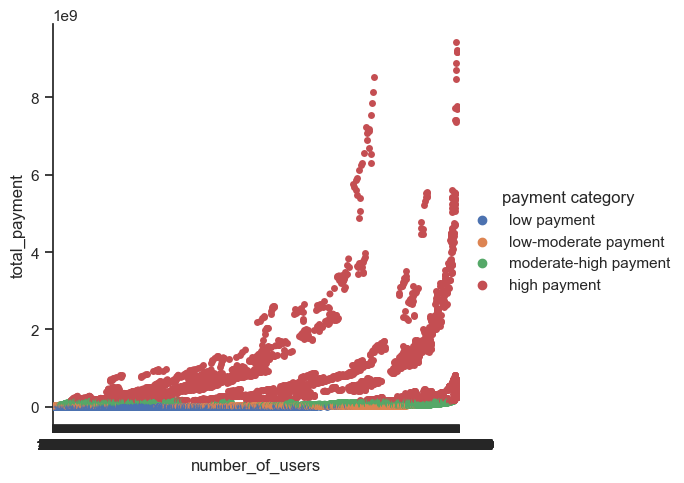

In [40]:
#create categorical plot
sns.set(style='ticks')
catplot = sns.catplot(x = 'number_of_users', y = 'total_payment', hue='payment category', data = nonzero_prov)

The high payments are clustered toward the lower number of user end, rather than higher.

In [41]:
#export catplot
catplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'catplot.png'))

### Question 7

So far, I have not been able to answer the questions since most of the data that I wanted to explore were string type data, which these analyses couldn't run. The last catplot showed high payments with less users, so I would like to delve more into that relationship to see specifically the types of services that were rendered to better understand. 

### Question 8

Potential hypotheses:
- If total payments are higher with less users, then there is a higher likelihood of FWA (fraud,waste,abuse), i.e. billing more unncessary, expensive services
- If there are lot of users and less providers, then that area is likely to be undersaturated.